# Foraging models

In [1]:
from groo.groo import get_root
root_dir = get_root(".hidden_root_foraging")

import sys, os
sys.path.append(os.path.join(root_dir, "scripts", "lib"))
from models import forage_env_hayden

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Hayden 2011
- initial check

In [2]:
R,T,Tmat,Mmat,Regmat=forage_env_hayden(1,0.975,[0.1, 0.5], nepi=10)

In [3]:
# sam's code
Regmat=np.array(Regmat)
y=[Regmat[i][0] for i in range(0,len(Regmat))]
x_Rp=[Regmat[i][1] for i in range(0,len(Regmat))]
x_R=[Regmat[i][2] for i in range(0,len(Regmat))]
x=pd.DataFrame([x_Rp,x_R])
x=x.T

logit_model=sm.Logit(y,x)
result=logit_model.fit()
#print(result.summary2())
coef_Rp=result.params[0]
coef_R=result.params[1]
ratio=np.abs(coef_Rp)/np.abs(coef_R)
#print(ratio)

Optimization terminated successfully.
         Current function value: 0.150131
         Iterations 9


In [4]:
df = pd.DataFrame(Regmat, columns=["choice", "rew_patch", "rew_env", "travel_time", "patchID"])
df.head(25)

choice  rew_patch     rew_env  travel_time  patchID
0      0.0  78.461538  105.517241          0.1      0.0
1      1.0  76.500000   55.636364          0.1      0.0
2      0.0  85.000000   76.500000          0.1      1.0
3      0.0  86.569343   79.911111          0.1      1.0
4      0.0  85.247525   80.482759          0.1      1.0
5      0.0  84.732824   80.914286          0.1      1.0
6      0.0  83.229814   80.292683          0.1      1.0
7      0.0  80.362694   78.354430          0.1      1.0
8      0.0  77.639198   76.312849          0.1      1.0
9      0.0  76.487026   75.449915          0.1      1.0
10     0.0  74.193548   73.560372          0.1      1.0
11     0.0  72.413793   72.051650          0.1      1.0
12     0.0  69.180328   69.222661          0.1      1.0
13     0.0  67.073509   67.342398          0.1      1.0
14     0.0  64.496124   65.011601          0.1      1.0
15     0.0  61.789601   62.535519          0.1      1.0
16     0.0  58.511838   59.507692          0.1      1.0
17     0.0  55.423729   56.627907          0.1      1.0
18     0.0  52.099502   53.504117          0.1      1.0
19     1.0  52.099502   50.985179          0.1      1.0
20     0.0  77.468354   53.654485          0.1      2.0
21     0.0  92.656250   56.137271          0.1      2.0
22     0.0  91.595745   57.654227          0.1      2.0
23     0.0  91.735537   59.019751          0.1      2.0
24     0.0  89.333333   59.845614          0.1      2.0

#### Patch and global reward/t over 10 patches

Text(0.5, 1.0, 'patch reward')

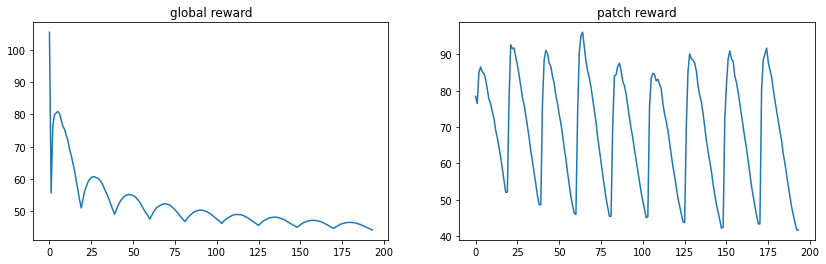

In [5]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
ax[0].plot(df["rew_env"])
ax[0].set_title("global reward")
ax[1].plot(df["rew_patch"])
ax[1].set_title("patch reward")



#### leaving times as a function of patch reward and global reward biases

In [6]:


# now run the simulation over several different bias inputs
biasA_vec=[1,1.01,1.02,1.03,1.05,1.05] #,1.06,1.07,1.08,1.09,1.1]
biasB_vec=[1,0.99,0.98,0.97,0.96,0.95] #,0.94,0.93,0.92,0.91,0.9]

heatmap_ratio_error = np.full([len(biasA_vec), len(biasB_vec)], np.nan)
heatmap_leaving_times = np.full([len(biasA_vec), len(biasB_vec)], np.nan)

for ibiasA in range(0,len(biasA_vec)):
    for ibiasB in range(0,len(biasB_vec)):
        biasA=biasA_vec[ibiasA]
        biasB=biasB_vec[ibiasB]
        
        R,T,Tmat,Mmat,Regmat=forage_env_hayden(biasA,biasB,[5])
        
        # what do coefficients look like?
        Regmat=np.array(Regmat)
        y=[Regmat[i][0] for i in range(0,len(Regmat))]
        x_Rp=[Regmat[i][1] for i in range(0,len(Regmat))]
        x_R=[Regmat[i][2] for i in range(0,len(Regmat))]
        x=pd.DataFrame([x_Rp,x_R])
        x=x.T
        #x=sm.tools.tools.add_constant(x) # here the constant should capture the influence of travel time
        logit_model=sm.Logit(y,x)
        result=logit_model.fit()
        #print(result.summary2())
        coef_Rp=result.params[0]
        coef_R=result.params[1]
        ratio=np.abs(coef_Rp)/np.abs(coef_R)
        error=np.abs((biasA/biasB)-np.abs(ratio))
        
        heatmap_ratio_error[ibiasA][ibiasB]=error
        heatmap_leaving_times[ibiasA][ibiasB]=np.mean(Tmat[:,1])
        

# 1. what are the leaving times for each of the biases?
# 2D array should be rows x columns (i.e. rows plotted along y, columns along x)
plt.imshow(heatmap_leaving_times, cmap='viridis')
plt.ylabel('Current Patch Reward Rate Bias')
plt.xlabel('Habitat Reward Rate Bias')
labelsY=[str(val) for val in biasA_vec]
labelsX=[str(val) for val in biasB_vec]
plt.yticks(range(0,len(biasA_vec)), labelsY, rotation='horizontal')
plt.xticks(range(0,len(biasB_vec)), labelsX, rotation='vertical')
plt.colorbar()
plt.title('Leaving Times (s)')
plt.show()



Optimization terminated successfully.
         Current function value: 0.055768
         Iterations 14


Optimization terminated successfully.
         Current function value: 0.051734
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.048824
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.044908
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.041898
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.040044
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.053047
         Iterations 14


Optimization terminated successfully.
         Current function value: 0.048299
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.044977
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.042417
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.040176
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.036318
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.049568
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.045309
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.040294
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.040704
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.037310
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.032754
         Iterations 17


Optimization terminated successfully.
         Current function value: 0.044748
         Iterations 15


Optimization terminated successfully.
         Current function value: 0.041610
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.038424
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.037674
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.032954
         Iterations 17


Optimization terminated successfully.
         Current function value: 0.029308
         Iterations 17


Optimization terminated successfully.
         Current function value: 0.041321
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.036515
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.034099
         Iterations 16


Optimization terminated successfully.
         Current function value: 0.030475
         Iterations 17


Optimization terminated successfully.
         Current function value: 0.029243
         Iterations 17


Optimization terminated successfully.
         Current function value: 0.027511
         Iterations 17


KeyboardInterrupt: 

#### Recovery error using logit

In [ ]:
# 2. What is error of the coefficient ratio (compared with the actual input)?
plt.imshow(heatmap_ratio_error, cmap='viridis')
plt.ylabel('Current Patch Reward Rate Bias')
plt.xlabel('Habitat Reward Rate Bias')
labelsY=[str(val) for val in biasA_vec]
labelsX=[str(val) for val in biasB_vec]
plt.yticks(range(0,len(biasA_vec)), labelsY, rotation='horizontal')
plt.xticks(range(0,len(biasB_vec)), labelsX, rotation='vertical')
plt.colorbar()
plt.title('Coefficient Ratio Error (BiasY/BiasX - coeff.Y/coeff.X)')
plt.show()

#### Param recvery using optim

In [ ]:
# Generate N data sets 